In [70]:
import matplotlib.pyplot as plt
import json
import os
import numpy as np
from matplotlib.pyplot import figure
import glob

In [71]:
dataset_metadata = { 'yelp': {'n_class': 2, "train_size": 30400, "val_size": 3800, 'metric': 'acc', 'coverage': 0.83}, 
                     'imdb': {'n_class': 2, "train_size": 20000, "val_size": 2500, 'metric': 'acc', 'coverage': 0.88},
                     'trec': {'n_class': 6, "train_size": 4800, "val_size": 500, 'metric': 'acc', 'coverage': 0.95},
                     'youtube': {'n_class': 2,"train_size": 2000, "val_size": 120, 'metric': 'acc', 'coverage': 0.87},
                     'chemprot': {'n_class': 10,"train_size": 12600, "val_size": 1607, 'metric': 'acc', 'coverage': 0.86},
                     'spouse': {"train_size": 22254, "val_size": 2811, 'metric': 'f1_binary', 'coverage': 0.25},
                     'cdr': {"train_size": 8430, "val_size": 920, 'metric': 'f1_binary', 'coverage': 0.907},
                     'amazon31': {'n_class': 31,"train_size": 131781, "val_size": 5805, 'metric': 'acc'},
                      'banking77': {'n_class': 77,"train_size": 9003, "val_size": 1000, 'metric': 'acc'},
                      'massive_lowcard': {"train_size": 11514, "val_size": 2033, 'metric': 'acc'},
                      'dbpedia': {"train_size": 560000, "val_size": 5000, 'metric': 'acc'},
                      'semeval': {'n_class': 9,'train_size': 1749, "val_size": 178, 'metric': 'acc'},
                     'agnews': {'n_class': 4, 'train_size': 96000, "val_size": 12000,'metric': 'acc'},
                     'claude9': {"train_size": 5469, "val_size": 200, 'metric': 'f1_macro'}, 
                     'massive18': {"train_size": 11514, "val_size": 2033, 'metric': 'acc'},
                     
                     'massive_en': {"train_size": 11564, "val_size": 3305, 'metric': 'acc'},
                     
                     'massive_cn': {"train_size": 11564, "val_size": 3305, 'metric': 'acc'},
                     'massive_cn2': {"train_size": 11564, "val_size": 3305, 'metric': 'acc'},
                    #TODO change the size
                     'massive_nb': {"train_size": 11564, "val_size": 3305, 'metric': 'acc'},
                     'massive_nb2': {"train_size": 11564, "val_size": 3305, 'metric': 'acc'},
                    
                     'massive_cn_append': {"train_size": 23128, "val_size": 3305, 'metric': 'acc'},
                     'massive_nb_append': {"train_size": 23128, "val_size": 3305, 'metric': 'acc'},
                     'massive_nb_inference': {"train_size": 11564, "val_size": 3305, 'metric': 'acc'},
                     'massive_cn_inference': {"train_size": 11564, "val_size": 3305, 'metric': 'acc'},
                     'massive_nb_append2': {"train_size": 23128, "val_size": 3305, 'metric': 'acc'},
                   }
result_directory = "./results"
# datasets = ['amazon31', 'banking77', 'claude9', 'dbpedia', 'massive18','chemprot']
N_RUNS = 5
PERCENT_TRIAL = 1
label_models = ['majority_voting']
end_models = ['bert_roberta_fixed']
# size_to_color = {5: "blue", 50: 'red', 19: 'orange'}
#                   } 
# LM_to_color = { 'majority_voting': 'blue', 
#                 'snorkel': 'orange',
#                 'val_as_train': 'black',
#                 'generative_model': 'green',
#                 'flying_squid': 'red',
#                 'dawid_skene': 'purple'}
# EM_to_color = {'mlp_model' : 'grey',
#                 'bert_classifier_model' : 'yellow'}

pip_to_style = {'val_as_train': 'solid',
                'fine_tune_on_val': 'dashed',
                'fine_tune_on_val_after' : 'dotted'}

ledeng_name = {'val_as_train': 'supervised-only',
                'fine_tune_on_val': 'weakly-supervised-only',
                'fine_tune_on_val_after' : 'continous-fine-tuning'}

dataset_to_color = {
                    'massive_cn_append': 'red',
                    'massive_cn_inference' : 'green',
                    'massive_en' : 'blue',
                    'massive_cn' : 'red',
                    'massive_cn2' : 'green',
                    'massive_nb_append': 'red',
                    'massive_nb_inference' : 'green',
                    'massive_nb' : 'red',
                    'massive_nb2' : 'green'
}


polt_files = {
    "massive_cn_variants": ["results/massive_cn_append/massive_cn_append-fine_tune_on_val-majority_voting-bert_classifier_model_roberta_fixed-soft-unstratified-fixed_hyperparam-fixed_steps(2).json",
        "results/massive_cn_append/massive_cn_append-val_as_train-majority_voting-bert_classifier_model_roberta_fixed-soft-unstratified-fixed_hyperparam-fixed_steps.json",
        "results/massive_cn_inference/massive_cn_inference-val_as_train-majority_voting-bert_classifier_model_roberta_fixed-soft-unstratified-fixed_hyperparam-fixed_steps.json",
        "results/massive-EN/massive_en-fine_tune_on_val-majority_voting-bert_classifier_model_roberta_fixed-soft-unstratified-fixed_hyperparam-fixed_steps.json",
        "results/massive-EN/massive_en-val_as_train-majority_voting-bert_classifier_model_roberta_fixed-soft-unstratified-fixed_hyperparam-fixed_steps.json"  
    ],
    "massive_cn": ["results/massive-CN/massive_cn-fine_tune_on_val-majority_voting-bert_classifier_model_chinese_fixed-soft-unstratified-fixed_hyperparam-fixed_steps.json",
        "results/massive-CN/massive_cn-val_as_train-majority_voting-bert_classifier_model_chinese_fixed-soft-unstratified-fixed_hyperparam-fixed_steps.json",
        "results/massive-CN2/massive_cn2-fine_tune_on_val-majority_voting-bert_classifier_model_chinese_fixed-soft-unstratified-fixed_hyperparam-fixed_steps_(2).json",
        "results/massive-CN2/massive_cn2-val_as_train-majority_voting-bert_classifier_model_chinese_fixed-soft-unstratified-fixed_hyperparam-fixed_steps_(2).json",
      ],
    "massive_nb_variants": [ "results/massive_nb_append/massive_nb_append-fine_tune_on_val-majority_voting-bert_classifier_model_roberta_fixed-soft-unstratified-fixed_hyperparam-fixed_steps.json",
        "results/massive_nb_append/massive_nb_append-val_as_train-majority_voting-bert_classifier_model_roberta_fixed-soft-unstratified-fixed_hyperparam-fixed_steps.json",
        "results/massive_nb_inference/massive_nb_inference-val_as_train-majority_voting-bert_classifier_model_roberta_fixed-soft-unstratified-fixed_hyperparam-fixed_steps.json",
        "results/massive-EN/massive_en-fine_tune_on_val-majority_voting-bert_classifier_model_roberta_fixed-soft-unstratified-fixed_hyperparam-fixed_steps.json",
        "results/massive-EN/massive_en-val_as_train-majority_voting-bert_classifier_model_roberta_fixed-soft-unstratified-fixed_hyperparam-fixed_steps.json"  
    ],
    "massive_nb": ["results/massive-NB/massive_nb-fine_tune_on_val-majority_voting-bert_classifier_model_nb_fixed-soft-unstratified-fixed_hyperparam-fixed_steps.json",
        "results/massive-NB/massive_nb-val_as_train-majority_voting-bert_classifier_model_nb_fixed-soft-unstratified-fixed_hyperparam-fixed_steps.json",
        "results/massive-NB2/massive_nb2-fine_tune_on_val-majority_voting-bert_classifier_model_nb_fixed-soft-unstratified-fixed_hyperparam-fixed_steps_(2).json",
        "results/massive-NB2/massive_nb2-val_as_train-majority_voting-bert_classifier_model_nb_fixed-soft-unstratified-fixed_hyperparam-fixed_steps_(2).json"   
    ]
}

## Investigation 1: Validation Set Sizes

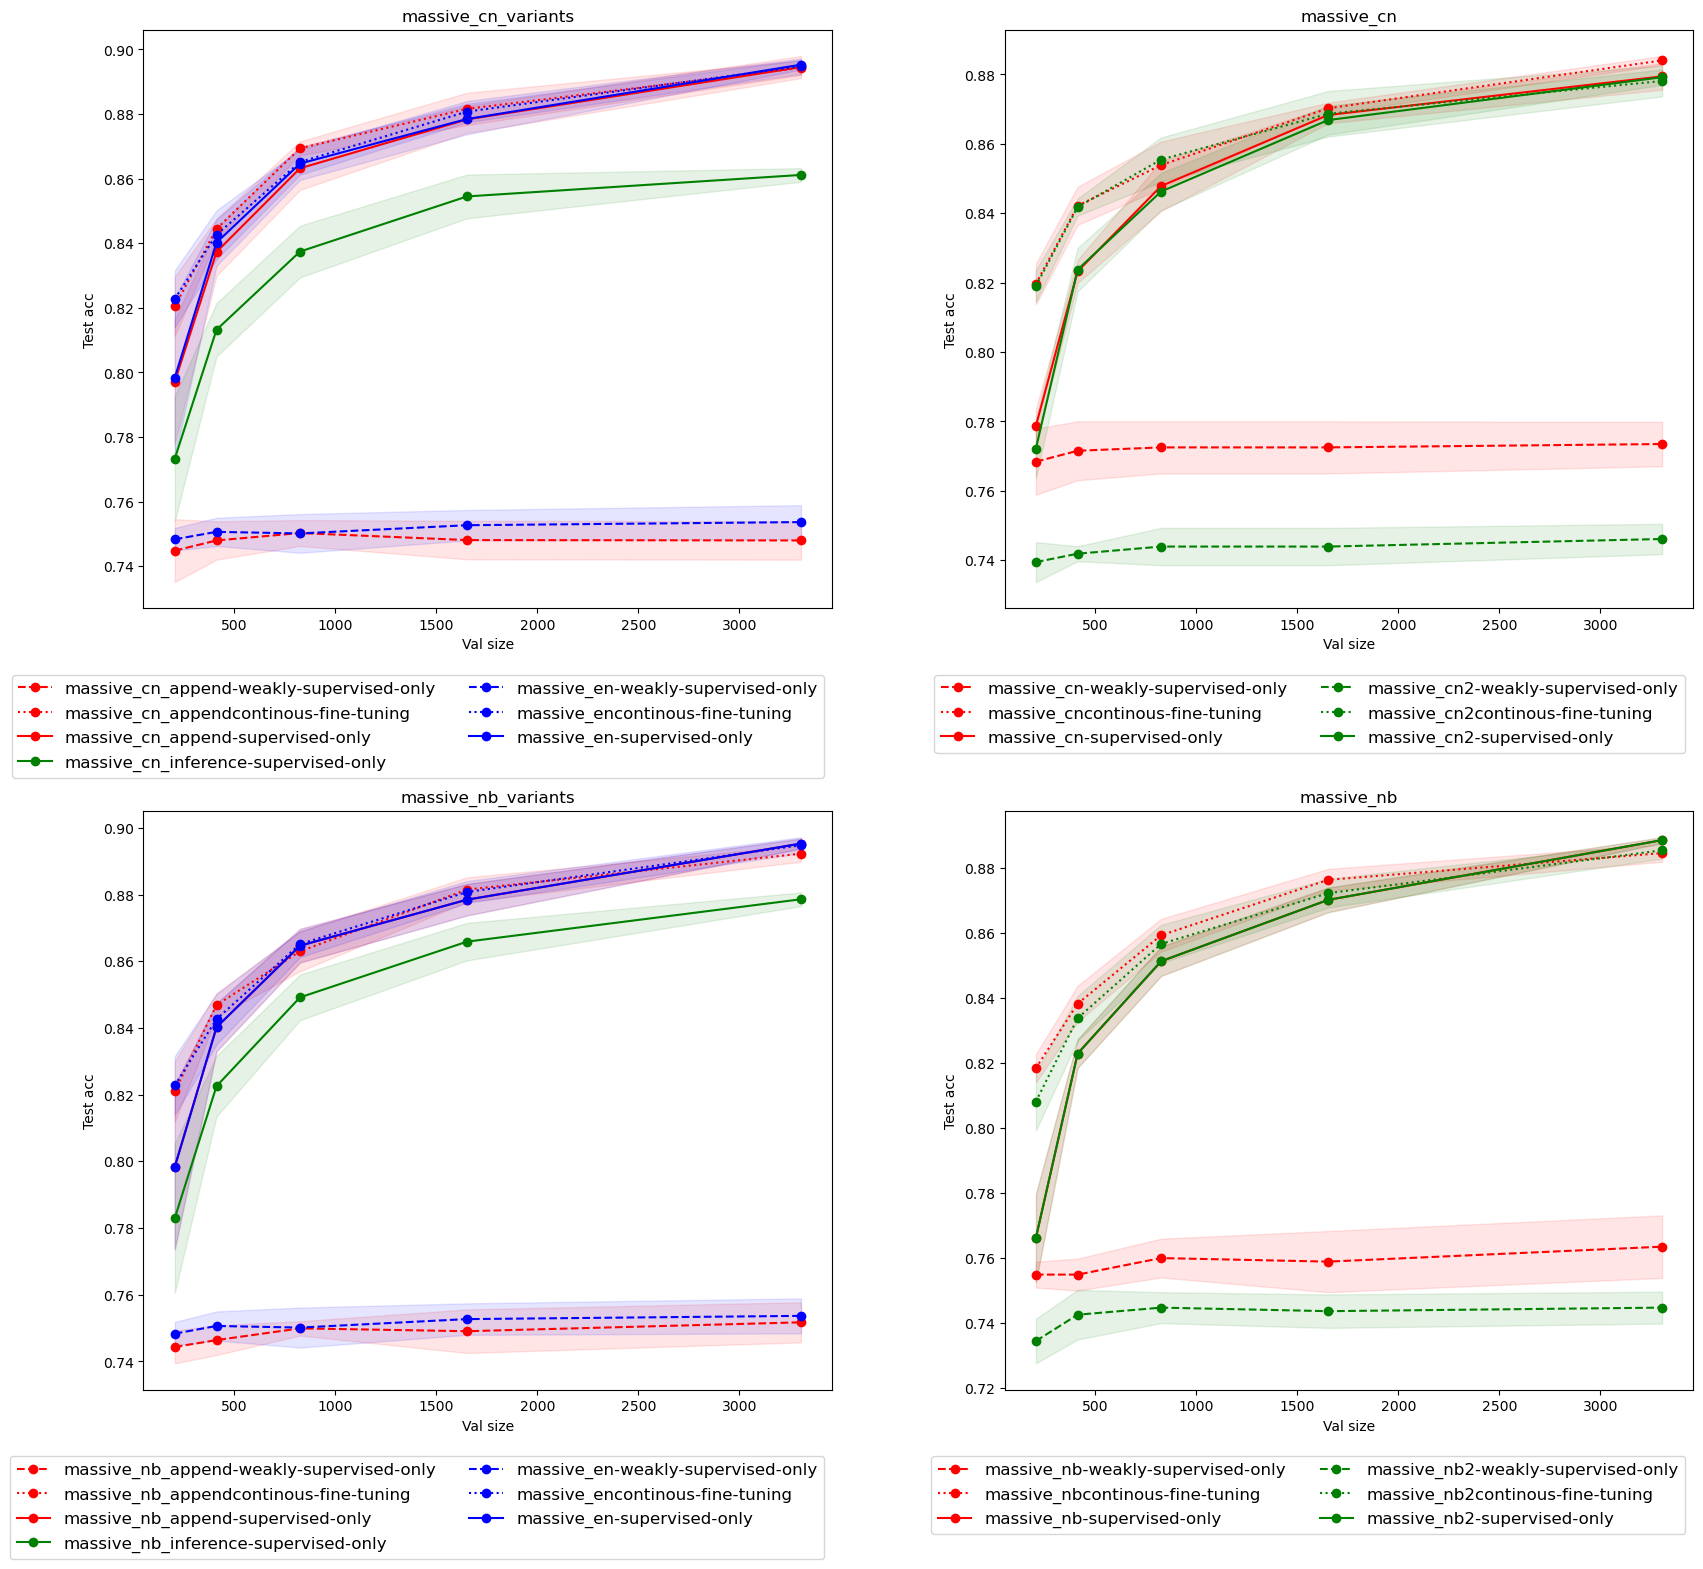

In [72]:
plotsize = len(polt_files)
row = 2
col = 2
fig, axs = plt.subplots(row, col, figsize=(20,8))
counter_x = 0
counter_y = 0
for name,files in polt_files.items():
    ax = axs[counter_y, counter_x]
    counter_x += 1
    if counter_x == col:
        counter_x = 0
        counter_y += 1
    for filepath in files:
        # finding the newest result
        with open(filepath) as f:
            file =  (filepath[3:]).split("/")[2].split('.')[0].split("-")
            dataset_name, pip ,LM, EM,  = file[:4]

            result_dict = json.load(f)
            x = result_dict.keys()
          
            x = np.array(list(x)).astype(float) * dataset_metadata[dataset_name]['val_size']
            em_test = [result_dict[k]["em_test"] for  k in result_dict]
            em_test_mean, em_test_std = zip(*[list(v.values())[0] for v in em_test])
            em_test_se = np.array(em_test_std) / np.sqrt(N_RUNS)

            ax.plot(x, em_test_mean, label = dataset_name +  '-' + ledeng_name[pip], color = dataset_to_color[dataset_name],  linestyle = pip_to_style[pip], marker='o')
            ax.fill_between(x, em_test_mean  - 1.96* em_test_se, em_test_mean + 1.96* np.array(em_test_se), alpha=0.1, color =  dataset_to_color[dataset_name])
            if pip == 'fine_tune_on_val': 
                pip = pip + "_after"

                tuned_em_test = [result_dict[k]["tuned_em_test"] for  k in result_dict]
                tuned_em_test_mean, tuned_em_test_std = zip(*[list(v.values())[0] for v in tuned_em_test])
                tuned_em_test_se = np.array(tuned_em_test_std) / np.sqrt(N_RUNS)
            
                ax.plot(x, tuned_em_test_mean, label = dataset_name + ledeng_name[pip], color = dataset_to_color[dataset_name], linestyle = pip_to_style[pip], marker='o')
                ax.fill_between(x, tuned_em_test_mean  - 1.96* tuned_em_test_se, tuned_em_test_mean + 1.96* np.array(tuned_em_test_se), alpha=0.1,  color = dataset_to_color[dataset_name])
    ax.set_title(name, fontsize=12)
    ax.set_xlabel("Val size", fontsize=10)
    ax.set_ylabel("Test {}".format(dataset_metadata[dataset_name]['metric']), fontsize=10)
    ax.legend(ncol=2, bbox_to_anchor=(1, -0.1), fontsize = 12)   
plt.subplots_adjust(bottom=-0.7, top=1.0, hspace=0.35, wspace=0.25)
plt.savefig("val_size")